In [1]:
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy as np

# Python for Data Analysis

**Written for the Chicago Fed Workshop, May 2016¶**

**Author:** Matthew McKay

One of the biggest selling points of **Python** is how easy it is to work with data. 

The **Python** ecosystem includes many useful packages to quickly work with data in a very agile way. 

**References:**
1. http://pandas.pydata.org/pandas-docs/stable/dsintro.html
1. http://quant-econ.net/py/pandas.html
1. http://pandas.pydata.org/pandas-docs/stable/10min.html
1. http://pandas.pydata.org/pandas-docs/stable/tutorials.html

**For Interested Participants** 

An excellent resource is the book *"Python for Data Analysis"*, by Wes McKinney

## Table of Contents:

1. The `pd.Series` and `pd.DataFrame` objects
   
    1. Basic idea
    1. Associated Methods
    
1. Working with Special Types of Data

    1. Timeseries
    1. Medium Sized Data
    
1. Resources

======================================================================================================================

## Series and DataFrame Objects

Many of the following examples are taken from the excellent Pandas Documentation: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

The two **primary** data objects in Pandas are:

1. Series
2. DataFrames

DataFrames can be thought of as a collection of Series. Selecting a column in a DataFrame will return a Series Object.

The **key** thing to keep in mind:

> data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

----------------------------___

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index which can include Index or MultiIndex objects

```
s = pd.Series(data, index=index)
```

data can take many different forms (i.e. dict, ndarray, lists, scalar etc). 

#### From Numpy Arrays

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s

a    0.606581
b   -1.001806
c   -0.982115
d   -1.359048
e   -0.969593
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
#-No Index Specified then will default to a numeric index-#
s = pd.Series(np.random.randn(5))

In [7]:
s

0    0.928374
1   -0.477474
2    0.490756
3   -0.046329
4   -0.227820
dtype: float64

#### From Dictionaries

In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [9]:
#-Data Alignment is Intrinsic!-#
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

#### Series Objects are Similar to Array Behaviour

In [10]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [11]:
s

a   -2.650916
b    0.761049
c   -0.476162
d   -0.261895
e    0.631278
dtype: float64

In [12]:
s[0]

-2.6509160572008716

In [13]:
s[1:3]

b    0.761049
c   -0.476162
dtype: float64

In [14]:
s[s > s.median()]

b    0.761049
e    0.631278
dtype: float64

In [15]:
s[[3,2,1]]

d   -0.261895
c   -0.476162
b    0.761049
dtype: float64

**Typically** pd.Series objects are very flexible

In [16]:
np.sum(s)

-1.996645688063219

In [17]:
s.sum()

-1.996645688063219

#### Indexing via the index can be done through the `ix` operator (or `loc` and `iloc` operator) (more important for DataFrames)

In [18]:
s.ix[['d','e']]

d   -0.261895
e    0.631278
dtype: float64

**but** becuase they are Series Objects we can also use them like dictionaries to get access to the data. **Don't** confuse this with DataFrame Objects where this syntax works on column labels

In [19]:
s[['d','e']]

d   -0.261895
e    0.631278
dtype: float64

#### Operations on Series Objects

In [20]:
s + s

a   -5.301832
b    1.522099
c   -0.952324
d   -0.523789
e    1.262555
dtype: float64

In [21]:
s * 2

a   -5.301832
b    1.522099
c   -0.952324
d   -0.523789
e    1.262555
dtype: float64

In [22]:
np.sqrt(s)

a         NaN
b    0.872381
c         NaN
d         NaN
e    0.794530
dtype: float64

A **key** difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [23]:
s[2:]                  #No A,B

c   -0.476162
d   -0.261895
e    0.631278
dtype: float64

In [24]:
s[:-2]                  #No D,E

a   -2.650916
b    0.761049
c   -0.476162
dtype: float64

In [25]:
s[2:] + s[:-2]         #Intrinsic Alignment, Union of Index Values

a         NaN
b         NaN
c   -0.952324
d         NaN
e         NaN
dtype: float64

#### Useful Built In Methods

In [26]:
s.describe()

count    5.000000
mean    -0.399329
std      1.369586
min     -2.650916
25%     -0.476162
50%     -0.261895
75%      0.631278
max      0.761049
dtype: float64

-----------------------------------------------------------------------

### DataFrame

Reference: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. **It is generally the most commonly used pandas object**. Like Series, DataFrame accepts many different kinds of input:

1. Dict of 1D ndarrays, lists, dicts, or Series
1. 2-D numpy.ndarray
1. Structured or record ndarray
1. A Series
1. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

**Note:** DataFrames have become a standard in the Python ecosystem and can be used with a lot of packages such as **statsmodels**, **scikit-learn** ...

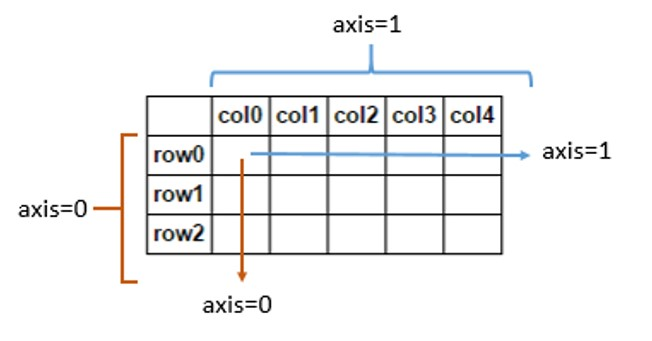

In [27]:
Image(filename='dataframe.jpg')          #TODO: Replace with Own Diagram

In [28]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [29]:
df          #-Automatic Alignment of Series based on Index-#

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [30]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [31]:
df.columns

Index(['one', 'two'], dtype='object')

#### Accessing Columns

In [32]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [33]:
type(df['one'])

pandas.core.series.Series

#### Accessing Rows

In [34]:
df.ix['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [35]:
type(df.ix['b'])

pandas.core.series.Series

#### Adding Columns

In [36]:
df['three'] = df['one'] + df['two']

In [37]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Selecting Multiple Columns

In [38]:
df[['one','three']]

,one,three
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0
d,NaN,NaN


#### Selecting Multiple Rows

In [39]:
df.ix[['b','c']]

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


In [40]:
df.loc[['b','c']]  #Just Label Based

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


In [41]:
df.iloc[[1,2]]    #Just Integer Based

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


#### Inserting Scalars

In [42]:
df['four'] = "What"   #Broadcasts and fills the Column

In [43]:
df

,one,two,three,four
a,1.0,1.0,2.0,What
b,2.0,2.0,4.0,What
c,3.0,3.0,6.0,What
d,NaN,4.0,NaN,What


#### Deleting a Column

In [44]:
del df['four']

In [45]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Transposing

In [46]:
df.T

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0
three,2.0,4.0,6.0,NaN


In [47]:
df.transpose()

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0
three,2.0,4.0,6.0,NaN


In [48]:
df              #Note: The underlying object hasn't changed due to no assignment

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


## Index Objects and Reshaping

In [49]:
df = pd.DataFrame({ 'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [50]:
df

,A,B,C,D,E
0,one,A,foo,0.793686,0.076280
1,one,B,foo,-1.261065,1.068702
2,two,C,foo,-0.334907,-0.614074
3,three,A,bar,-0.094119,0.698093
4,one,B,bar,-2.240365,-1.743093
5,one,C,bar,2.663319,1.748698
6,two,A,foo,-0.671731,0.177549
7,three,B,foo,-0.928573,1.392988
8,one,C,foo,0.092530,-0.110878
9,one,A,bar,-0.037859,0.189394


In [51]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.037859  0.793686
      B -2.240365 -1.261065
      C  2.663319  0.092530
three A -0.094119       NaN
      B       NaN -0.928573
      C -0.068976       NaN
two   A       NaN -0.671731
      B  0.105538       NaN
      C       NaN -0.334907

**Using MultiIndex** to reorganize the information in a DataFrame

In [52]:
dfi = df.set_index(['A','B','C'])

In [53]:
dfi

D         E
A     B C                      
one   A foo  0.793686  0.076280
      B foo -1.261065  1.068702
two   C foo -0.334907 -0.614074
three A bar -0.094119  0.698093
one   B bar -2.240365 -1.743093
      C bar  2.663319  1.748698
two   A foo -0.671731  0.177549
three B foo -0.928573  1.392988
one   C foo  0.092530 -0.110878
      A bar -0.037859  0.189394
two   B bar  0.105538 -0.187594
three C bar -0.068976  2.337373

In [54]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.037859  0.793686  0.189394  0.076280
      B -2.240365 -1.261065 -1.743093  1.068702
      C  2.663319  0.092530  1.748698 -0.110878
three A -0.094119       NaN  0.698093       NaN
      B       NaN -0.928573       NaN  1.392988
      C -0.068976       NaN  2.337373       NaN
two   A       NaN -0.671731       NaN  0.177549
      B  0.105538       NaN -0.187594       NaN
      C       NaN -0.334907       NaN -0.614074

In [55]:
dfi['D'].unstack(level='C')         #Same as the pivot table result

C             bar       foo
A     B                    
one   A -0.037859  0.793686
      B -2.240365 -1.261065
      C  2.663319  0.092530
three A -0.094119       NaN
      B       NaN -0.928573
      C -0.068976       NaN
two   A       NaN -0.671731
      B  0.105538       NaN
      C       NaN -0.334907

#### Comparison of DataFrame Objects

In [56]:
#-Compare-#
df1 = dfi['D'].unstack(level='C')
df2 = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

In [57]:
df1.equals(df2)

True

In [58]:
df1 == df2                #This performs element-by-element wise

C          bar    foo
A     B              
one   A   True   True
      B   True   True
      C   True   True
three A   True  False
      B  False   True
      C   True  False
two   A  False   True
      B   True  False
      C  False   True

In [59]:
df1           #Note: The above result has difficulty comparing NaN values

C             bar       foo
A     B                    
one   A -0.037859  0.793686
      B -2.240365 -1.261065
      C  2.663319  0.092530
three A -0.094119       NaN
      B       NaN -0.928573
      C -0.068976       NaN
two   A       NaN -0.671731
      B  0.105538       NaN
      C       NaN -0.334907

In [60]:
df2

C             bar       foo
A     B                    
one   A -0.037859  0.793686
      B -2.240365 -1.261065
      C  2.663319  0.092530
three A -0.094119       NaN
      B       NaN -0.928573
      C -0.068976       NaN
two   A       NaN -0.671731
      B  0.105538       NaN
      C       NaN -0.334907

## Sorting

In [61]:
s = pd.Series(range(4), index=['d','a','b','c'])

In [62]:
s

d    0
a    1
b    2
c    3
dtype: int64

In [63]:
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [64]:
df = pd.DataFrame(np.arange(8).reshape((2,4)), index=['three','one'], columns=['d','a','b','c'])

In [65]:
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [66]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [67]:
df.sort_index(axis=1)        #Columns

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [68]:
#-Sort by Values-#
df.sort_values(by='a')

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


#### Chain Operations Together

In [69]:
df.sort_index(axis=1).sort_values(by='a', ascending=False)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


**Note:** Using a MultiIndex you can also sort by different **levels** in the index

### Ranking

In [70]:
df = df.T

In [71]:
df

,three,one
d,0,4
a,1,5
b,2,6
c,3,7


In [72]:
df.rank()

,three,one
d,1.0,1.0
a,2.0,2.0
b,3.0,3.0
c,4.0,4.0


-----------------------------------------------------------------------

## Split-Apply-Combine

DataFrames also support more advanced operations such as **groupby**  which can be very powerful when aggregating data based on groups and performing some operations over them

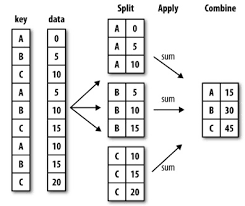

In [73]:
Image(filename='split-apply-combine.png')

In [74]:
key = ['A','B','C','A','B','C','A','B','C']
data = [0,5,10,5,10,15,10,15,20]
df = pd.DataFrame(data, index=key, columns=['data'])

In [75]:
df

,data
A,0
B,5
C,10
A,5
B,10
C,15
A,10
B,15
C,20


In [76]:
#-Groupby Index Level-#
df.groupby(level=0).sum()

,data
A,15
B,30
C,45


In [77]:
df = df.reset_index()
df.columns=["key","data"]
df.groupby(by=["key"]).sum()

,data
key,
A,15
B,30
C,45


======================================================================================================================

## Working with Special Types of Data

**Pandas** has a support for different types of data such as:

1. Time Series
1. Categoricals (very recently)

Reference: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [78]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [79]:
ts.head()

2012-01-01 00:00:00    251
2012-01-01 00:00:01    420
2012-01-01 00:00:02    145
2012-01-01 00:00:03    235
2012-01-01 00:00:04    384
Freq: S, dtype: int64

In [80]:
ts.tail()

2012-01-01 00:03:15    111
2012-01-01 00:03:16     12
2012-01-01 00:03:17     42
2012-01-01 00:03:18     97
2012-01-01 00:03:19     75
Freq: S, dtype: int64

#### Resampling the Time Series

In [81]:
ts.resample('1Min')  #TODO: Update

/home/matthewmckay/anaconda/lib/python3.5/site-packages/IPython/lib/pretty.py:108: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return getattr(obj, attr, default)


DatetimeIndexResampler [freq=<Minute>, axis=0, closed=left, label=left, convention=start, base=0]

In [82]:
ts.resample('1Min', how='mean')   #TODO: Update

/home/matthewmckay/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


2012-01-01 00:00:00    240.750000
2012-01-01 00:01:00    239.250000
2012-01-01 00:02:00    260.816667
2012-01-01 00:03:00    171.500000
Freq: T, dtype: float64

In [83]:
ts.resample('1Min', how='sum')   #TODO: Update

/home/matthewmckay/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2012-01-01 00:00:00    14445
2012-01-01 00:01:00    14355
2012-01-01 00:02:00    15649
2012-01-01 00:03:00     3430
Freq: T, dtype: int64

#### Working with Time Series Data

**See:** pandas-explore-fred-data.ipynb as an example of working with real world data

Let's work with some random generated data)

In [84]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/1990', periods=1000))

In [85]:
s.head()

1990-01-01    0.551383
1990-01-02    0.004238
1990-01-03   -0.676016
1990-01-04   -0.855016
1990-01-05    1.285163
Freq: D, dtype: float64

In [86]:
s.tail()

1992-09-22    0.690017
1992-09-23    1.723506
1992-09-24   -0.564532
1992-09-25    0.344585
1992-09-26   -0.513278
Freq: D, dtype: float64

In [87]:
len(s)

1000

In [88]:
s = s.cumsum()      #Generate a cumulative sum

In [89]:
r = pd.rolling_mean(s, 60, center=True)                    #TODO: Update
#Note: r = s.rolling(window=60) [As of Pandas version 0.18]

/home/matthewmckay/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=60).mean()
  if __name__ == '__main__':


In [90]:
data = pd.DataFrame({'s' : s, 'r' : r})

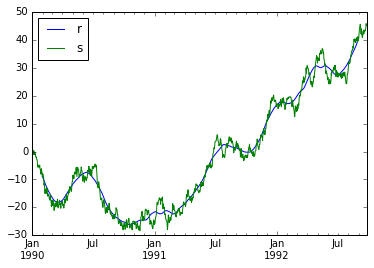

In [91]:
data.plot()

-----------------------------------------------------------------------

# Example \#1: CFNAI Data

Replicating the following graph using Pandas

1. Working with Hierarchical Data
1. Working with datetime objects

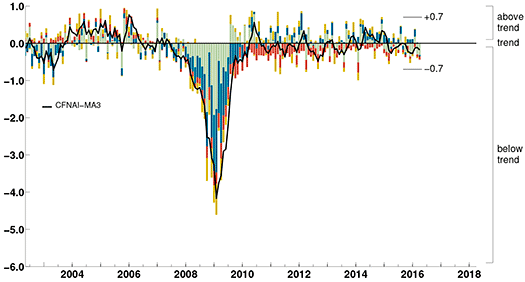

In [92]:
Image("./cfnai-monthly-ma3-png.png")

In [114]:
df = pd.read_excel("./cfnai-data-series-xlsx.xlsx")

In [115]:
df.index

Index(['1967:03', '1967:04', '1967:05', '1967:06', '1967:07', '1967:08',
       '1967:09', '1967:10', '1967:11', '1967:12',
       ...
       '2015:06', '2015:07', '2015:08', '2015:09', '2015:10', '2015:11',
       '2015:12', '2016:01', '2016:02', '2016:03'],
      dtype='object', length=589)

In [116]:
df.index = df.index.str.split(":", expand=True)

In [117]:
df.index.set_levels(df.index.levels[0].map(lambda x: int(x)), level=0, inplace=True)
df.index.set_levels(df.index.levels[1].map(lambda x: int(x)), level=1, inplace=True)

In [118]:
df.index.names = ["year","month"]

In [119]:
df.head()

P_I      EU_H       C_H      SO_I     CFNAI  CFNAI_MA3  \
year month                                                                
1967 3     -0.369880 -0.062517 -0.036264 -0.021383 -0.490010        NaN   
     4      0.223156 -0.243228 -0.008409 -0.114427 -0.142874        NaN   
     5     -0.611894  0.111490 -0.057219 -0.103701 -0.661290  -0.431391   
     6     -0.150152  0.102446  0.071709 -0.034229 -0.010192  -0.271452   
     7     -0.283465  0.193661 -0.066431 -0.186489 -0.342690  -0.338057   

            DIFFUSION  
year month             
1967 3            NaN  
     4            NaN  
     5      -0.217897  
     6      -0.199257  
     7      -0.247779

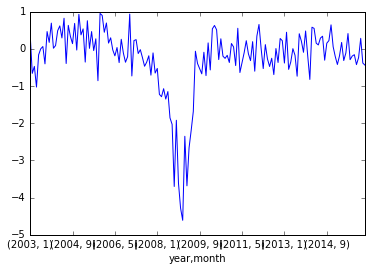

In [128]:
df.ix[2003:2016]['CFNAI'].plot()

In [126]:
df.ix[2003:2016][['P_I', 'EU_H', 'C_H', 'SO_I']].head()

P_I      EU_H       C_H      SO_I
year month                                        
2003 1      0.161773  0.059513  0.062086  0.119393
     2     -0.008320 -0.431139 -0.066996 -0.154053
     3     -0.137302 -0.476053  0.114220  0.025863
     4     -0.539615 -0.374927  0.092435 -0.206530
     5     -0.042670 -0.277445  0.084537  0.072942

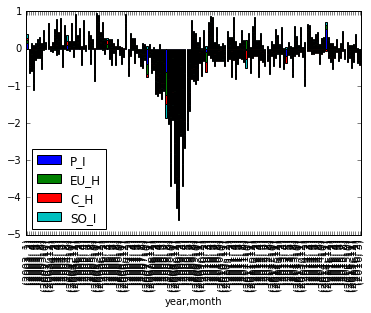

In [151]:
df.ix[2003:2016][['P_I', 'EU_H', 'C_H', 'SO_I']].plot(kind='bar', stacked=True)

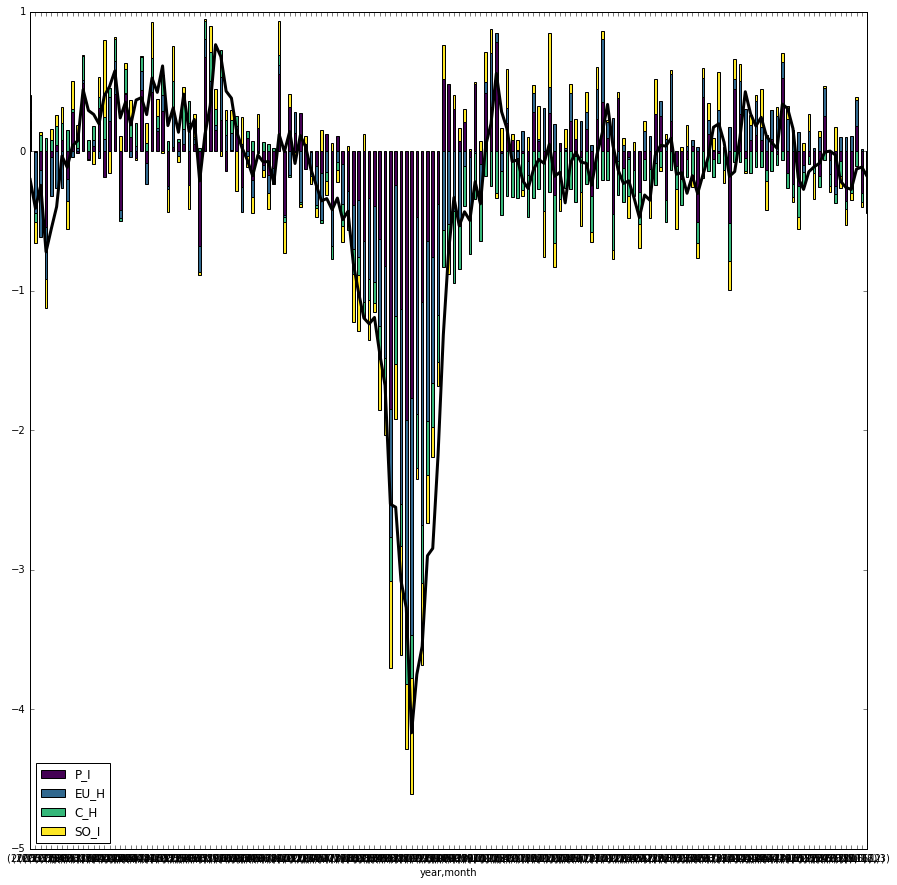

In [150]:
#-Produce Composite Charts-#
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(15, 15))
df.ix[2003:2016][['P_I', 'EU_H', 'C_H', 'SO_I']].plot(ax=fig.gca(), kind='bar', stacked=True, colormap=cm.viridis)
df.ix[2003:2016]['CFNAI_MA3'].plot(ax=fig.gca(), color="black", linewidth=3)

### Using Datetime Objects

In [152]:
df = pd.read_excel("./cfnai-data-series-xlsx.xlsx")
df.index = df.index.str.split(":", expand=True)
# df.index.set_levels(df.index.levels[0].map(lambda x: int(x)), level=0, inplace=True)
# df.index.set_levels(df.index.levels[1].map(lambda x: int(x)), level=1, inplace=True)
df.index.names = ["year","month"]
df.reset_index(inplace=True)

In [153]:
df.head()

,year,month,P_I,EU_H,C_H,SO_I,CFNAI,CFNAI_MA3,DIFFUSION
0,1967,03,-0.369880,-0.062517,-0.036264,-0.021383,-0.490010,NaN,NaN
1,1967,04,0.223156,-0.243228,-0.008409,-0.114427,-0.142874,NaN,NaN
2,1967,05,-0.611894,0.111490,-0.057219,-0.103701,-0.661290,-0.431391,-0.217897
3,1967,06,-0.150152,0.102446,0.071709,-0.034229,-0.010192,-0.271452,-0.199257
4,1967,07,-0.283465,0.193661,-0.066431,-0.186489,-0.342690,-0.338057,-0.247779


In [154]:
df['day'] = 1
df.index = pd.to_datetime(df[['year','month', 'day']])
df.drop(['year','month','day'], axis=1, inplace=True)

In [155]:
df.index

DatetimeIndex(['1967-03-01', '1967-04-01', '1967-05-01', '1967-06-01',
               '1967-07-01', '1967-08-01', '1967-09-01', '1967-10-01',
               '1967-11-01', '1967-12-01',
               ...
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01'],
              dtype='datetime64[ns]', length=589, freq=None)

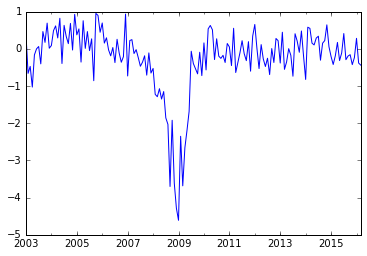

In [156]:
df.ix['2003':'2018']['CFNAI'].plot()

In [162]:
df.ix['2003':'2018'][['P_I', 'EU_H', 'C_H', 'SO_I']].head()

,P_I,EU_H,C_H,SO_I
2003-01-01,0.161773,0.059513,0.062086,0.119393
2003-02-01,-0.008320,-0.431139,-0.066996,-0.154053
2003-03-01,-0.137302,-0.476053,0.114220,0.025863
2003-04-01,-0.539615,-0.374927,0.092435,-0.206530
2003-05-01,-0.042670,-0.277445,0.084537,0.072942


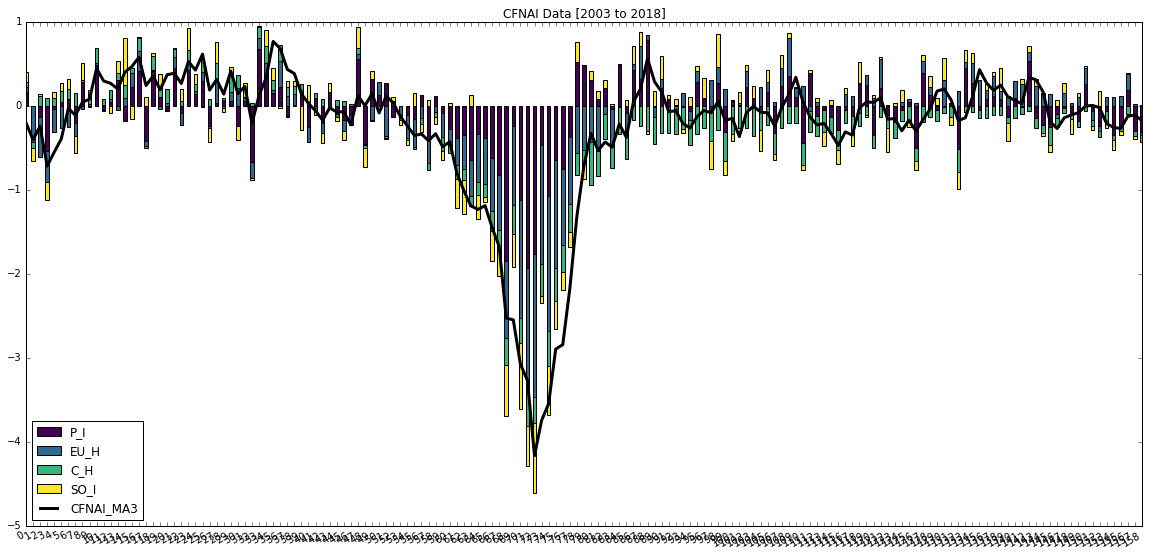

In [206]:
#-Produce Composite Chart-#
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
df.ix['2003':'2018'][['P_I', 'EU_H', 'C_H', 'SO_I']].plot(ax=ax, kind='bar', stacked=True, colormap=cm.viridis, use_index=False)
df.ix['2003':'2018'][['CFNAI_MA3']].plot(ax=ax, color="black", linewidth=3, use_index=False)
ax.set_title("CFNAI Data [2003 to 2018]");

In [184]:
dates = pd.date_range(start="2003",end="2018", freq='M')
dates.year

array([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2015, 2015, 2015, 2015, 2015, 2015, 20

In [185]:
#TODO: FIX X-AXIS of GRAPHS

In [ ]:
#TODO: Add Sliders for Time Scales and Redrawn Graphs

### Bokeh Plot

In [ ]:
#TODO: Complete Bokeh Plot (if time permits) for interactive charts

=======================================================================================================================

## Medium Sized DataSets (International Trade)

Some problems start to become large and may demand working with more sophisticated tools such as **pandas**. Very large problems require data management tools such as SQL, NoSQL, and Graph based Datasets; but a large number of problems are in between: not small enough for Excel and manual manipulation, but annoyingly small to have to learn database management. **Pandas** sits in this space nicely as a spreadsheet type abstraction that is scalable. Pandas is focused on **in-memory** datasets (i.e. datasets that can fit into RAM)

Let's consider Product Level International Exports data for the world economy.

**Files Required:**
Go to http://atlas.media.mit.edu/en/resources/data/ and download
1. SITC4 Rev. 2 (1962 to 2013) - "Product Trade between Origin and Destination Country by Year (bilateral)"
2. "Country Names"
3. "SITC Revision 2 Product Names"


In [91]:
export = "data/year_origin_sitc_rev2.tsv"
cname = "data/country_names.tsv"
pname = "data/products_sitc_rev2.tsv"

In [92]:
export = pd.read_csv(export, sep='\t')
cname = pd.read_csv(cname, sep='\t')
pname = pd.read_csv(pname, sep='\t')

#### Let's take look at the data

In [93]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000,2000,0.013854,NaN
1,1962,afg,250,66000,0,0.384611,NaN
2,1962,afg,540,74000,0,2.358660,NaN
3,1962,afg,545,17000,0,0.074049,NaN
4,1962,afg,548,33000,0,0.691940,NaN


In [94]:
cname.head()

,id,id_3char,name
0,afago,ago,Angola
1,afbdi,bdi,Burundi
2,afben,ben,Benin
3,afbfa,bfa,Burkina Faso
4,afbwa,bwa,Botswana


In [95]:
pname.head()

,id,sitc,name
0,105722,5722,Initiating Devices
1,105838,5838,Polymerization Ion Exchangers
2,106250,6250,"Rubber tires, tire cases, inner and flaps, for..."
3,106251,6251,Car Tires
4,106280,6280,Other articles of rubber


In [96]:
#-Memory Usage-#
export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002928 entries, 0 to 5002927
Data columns (total 7 columns):
year          int64
origin        object
sitc_rev2     int64
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 305.4+ MB


#### Let's Focus on the Export Data

In [97]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000,2000,0.013854,NaN
1,1962,afg,250,66000,0,0.384611,NaN
2,1962,afg,540,74000,0,2.358660,NaN
3,1962,afg,545,17000,0,0.074049,NaN
4,1962,afg,548,33000,0,0.691940,NaN


In [98]:
export.shape

(5002928, 7)

In [99]:
export.describe()

,year,sitc_rev2,export_val,import_val,export_rca,import_rca
count,5002928.000000,5002928.000000,4.918819e+06,4.999516e+06,4918819.000000,3950609.000000
mean,1993.513410,5548.390583,4.548178e+07,4.458144e+07,2.593615,1.616125
std,13.116049,2673.359200,7.879395e+08,7.787933e+08,87.795506,21.995977
min,1962.000000,10.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1985.000000,2929.000000,0.000000e+00,4.456700e+04,0.000000,0.130933
50%,1995.000000,6553.000000,3.672900e+04,6.300000e+05,0.035696,0.522320
75%,2004.000000,7435.000000,1.670977e+06,6.331729e+06,0.443627,1.307450
max,2013.000000,9710.000000,3.052372e+11,3.366875e+11,81664.200000,21594.500000


**Warning:** Be careful with how the data is represented when it is imported. SITC revision 2 codes are typically 4 digits long, that incorporate leading zeros. When working with data always take time to inspect your data

In [100]:
export = "data/year_origin_sitc_rev2.tsv"
export = pd.read_csv(export, sep='\t', converters={'sitc_rev2':str})

pname = "data/products_sitc_rev2.tsv"
pname = pd.read_csv(pname, sep='\t', converters={'sitc':str})

In [101]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,0230,4000,2000,0.013854,NaN
1,1962,afg,0250,66000,0,0.384611,NaN
2,1962,afg,0540,74000,0,2.358660,NaN
3,1962,afg,0545,17000,0,0.074049,NaN
4,1962,afg,0548,33000,0,0.691940,NaN


In [102]:
export.describe()

,year,export_val,import_val,export_rca,import_rca
count,5002928.000000,4.918819e+06,4.999516e+06,4918819.000000,3950609.000000
mean,1993.513410,4.548178e+07,4.458144e+07,2.593615,1.616125
std,13.116049,7.879395e+08,7.787933e+08,87.795506,21.995977
min,1962.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1985.000000,0.000000e+00,4.456700e+04,0.000000,0.130933
50%,1995.000000,3.672900e+04,6.300000e+05,0.035696,0.522320
75%,2004.000000,1.670977e+06,6.331729e+06,0.443627,1.307450
max,2013.000000,3.052372e+11,3.366875e+11,81664.200000,21594.500000


In [103]:
export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002928 entries, 0 to 5002927
Data columns (total 7 columns):
year          int64
origin        object
sitc_rev2     object
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 305.4+ MB


In [104]:
#-Compute Number of Countries-#
export['origin'].drop_duplicates().size

250

In [105]:
#-Compute Number of Years-#
export['year'].drop_duplicates().size

52

In [106]:
#-Compute Number of Products-#
export['sitc_rev2'].drop_duplicates().size

986

### Compute RCA Values

We can use this Data to Compute a Measure of Comparative Advantage for:
1. 250 Countries
1. 52 Years, and
1. 986 Prodoucts


Let's use the standard Balassa definition of Revealed Comparative Advantage (RCA)

$$
RCA_{cpt} =\frac{E_{cpt}}{E_{ct}} / \frac{E_{pt}}{E_t}
$$

**Reference:** Balassa, B. (1965), Trade Liberalisation and Revealed Comparative Advantage, The Manchester School, 33, 99-123.


In [108]:
data = export[["year","origin","sitc_rev2","export_val","export_rca"]]

In [109]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca
0,1962,afg,0230,4000,0.013854
1,1962,afg,0250,66000,0.384611
2,1962,afg,0540,74000,2.358660
3,1962,afg,0545,17000,0.074049
4,1962,afg,0548,33000,0.691940


In [110]:
cntry_total = data.groupby(by=["year","origin"]).sum()[["export_val"]]
cntry_total.columns=['ctotal']
product_total = data.groupby(by=["year","sitc_rev2"]).sum()[["export_val"]]
product_total.columns=['ptotal']
world_total = data.groupby(by=["year"]).sum()[["export_val"]]
world_total.columns=['wtotal']

In [111]:
cntry_total.head()

ctotal
year origin            
1962 afg       86135000
     ago      119458000
     alb        2688000
     are           2000
     arg     1430519000

In [112]:
product_total.head()

ptotal
year sitc_rev2           
1962 0010         1776000
     0011       478649000
     0012        44891000
     0013        67317000
     0014        25580000

In [113]:
world_total.head()

,wtotal
year,
1962,1.437881e+11
1963,1.588631e+11
1964,1.796778e+11
1965,1.962422e+11
1966,2.167287e+11


In [114]:
data = data.merge(cntry_total.reset_index(), on=["year","origin"])

In [115]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal
0,1962,afg,0230,4000,0.013854,86135000
1,1962,afg,0250,66000,0.384611,86135000
2,1962,afg,0540,74000,2.358660,86135000
3,1962,afg,0545,17000,0.074049,86135000
4,1962,afg,0548,33000,0.691940,86135000


In [116]:
#-Check what these Operations have Done-#
data[data.origin == 'afg'][["year","origin","ctotal"]].drop_duplicates().head()

,year,origin,ctotal
0,1962,afg,86135000
36223,1963,afg,105038000
74727,1964,afg,84797000
113808,1965,afg,91223000
154163,1966,afg,114601000


In [117]:
data = data.merge(product_total.reset_index(), on=["year","sitc_rev2"])
data = data.merge(world_total.reset_index(), on=["year"])

In [118]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal
0,1962,afg,0230,4000,0.013854,86135000,438674000,1.437881e+11
1,1962,arg,0230,7162000,1.493650,1430519000,438674000,1.437881e+11
2,1962,aus,0230,66077000,9.519820,2070759000,438674000,1.437881e+11
3,1962,aut,0230,3071000,0.953014,961366000,438674000,1.437881e+11
4,1962,bel,0230,4802000,0.348457,4111319000,438674000,1.437881e+11


In [119]:
data["computed_rca"] = (data["export_val"]/data["ctotal"])/(data["ptotal"]/data["wtotal"])

In [120]:
data["diff"] = data["export_rca"] - data["computed_rca"]

In [121]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal,computed_rca,diff
0,1962,afg,0230,4000,0.013854,86135000,438674000,1.437881e+11,0.015222,-0.001367
1,1962,arg,0230,7162000,1.493650,1430519000,438674000,1.437881e+11,1.641050,-0.147400
2,1962,aus,0230,66077000,9.519820,2070759000,438674000,1.437881e+11,10.459280,-0.939460
3,1962,aut,0230,3071000,0.953014,961366000,438674000,1.437881e+11,1.047061,-0.094047
4,1962,bel,0230,4802000,0.348457,4111319000,438674000,1.437881e+11,0.382844,-0.034387


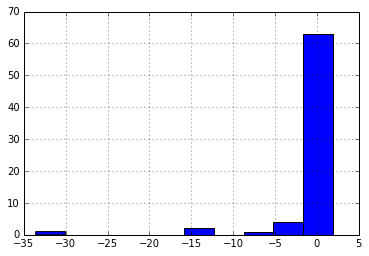

In [122]:
#-Let's check How different the Computed Numbers are for Afghanistan-#
%matplotlib inline
data[(data.year==1962) & (data.origin=="afg")]['diff'].hist()

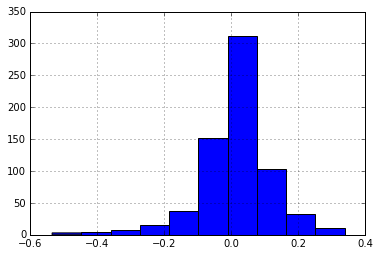

In [123]:
#-USA-#
data[(data.year==1962) & (data.origin=="usa")]['diff'].hist()

====================================================================================================================

## Web Data

Let's consider a practical and everyday type of problem. Say we want to collect some data from a web site that has some embedded tables. Let's make use of the PyPI package index and check out the search results for `economics`.

1. https://pypi.python.org/pypi
2. Search `economics`
3. Check the structure of the web link (https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search)

In [124]:
#-Web Data and Web Scraping-#

import pandas as pd
import requests

url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)

In [125]:
#page.      #-Explore the Object, This is a Representation of a Web Page-#

In [126]:
page.text

'<?xml version="1.0" encoding="utf-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n\n  <html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\n    <head>\n      \n      <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n      <title>Index of Packages Matching \'economics\' : Python Package Index</title>\n      <meta content="python programming language object oriented web free source package index download software"/>\n      <meta content="The Python Package Index is a repository of software for the Python programming language."/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 latest updates" href="https://pypi.python.org/pypi?:action=rss"/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 newest packages" href="https://pypi.python.org/pypi?:action=packages_rss"/>\n       <link rel="stylesheet" media="screen" href="/static/styl

In [127]:
table = pd.read_html(page.text)

In [128]:
table[0]

,0,1,2
0,Package,Weight*,Description
1,economics 0.1.2,11,Functions and data manipulation for economics ...
2,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
3,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
4,econometrics 0.1.,4,Python economics library
5,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
6,dismalpy 0.2.3,2,DismalPy: a collection of resources for quanti...
7,dismalpy 0.2.2,2,DismalPy: a collection of resources for quanti...
8,econ 0.4,2,"An open set of economics related tools, data a..."
9,FRB 1.1.1,2,Federal Reserve Economic Data (FRED)


In [129]:
#-Use Infered Header Information-#
table = pd.read_html(page.text, header=0)[0]

In [130]:
#-Nicely Formatted Table-#
table

,Package,Weight*,Description
0,economics 0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
2,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
3,econometrics 0.1.,4,Python economics library
4,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy 0.2.3,2,DismalPy: a collection of resources for quanti...
6,dismalpy 0.2.2,2,DismalPy: a collection of resources for quanti...
7,econ 0.4,2,"An open set of economics related tools, data a..."
8,FRB 1.1.1,2,Federal Reserve Economic Data (FRED)
9,FRB 1.1.2,2,Federal Reserve Economic Data (FRED)


In [131]:
#-Final Code-#
url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)
table = pd.read_html(page.text, header=0)[0]

In [132]:
table

,Package,Weight*,Description
0,economics 0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
2,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
3,econometrics 0.1.,4,Python economics library
4,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy 0.2.3,2,DismalPy: a collection of resources for quanti...
6,dismalpy 0.2.2,2,DismalPy: a collection of resources for quanti...
7,econ 0.4,2,"An open set of economics related tools, data a..."
8,FRB 1.1.1,2,Federal Reserve Economic Data (FRED)
9,FRB 1.1.2,2,Federal Reserve Economic Data (FRED)


**Next**

Let's say we would like the names and version numbers to be contained in different columns?

http://pandas.pydata.org/pandas-docs/stable/text.html

In [133]:
table["Name"] = table.Package.str.split().str.get(0)
table["Version"] = table.Package.str.split().str.get(1)

In [134]:
#-Let's Order the table by Specifying some Variables, and getting rid of the old Package Name-#
table = table[["Name","Version","Weight*","Description"]]

In [135]:
table.drop_duplicates(subset=["Name"])

,Name,Version,Weight*,Description
0,economics,0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics,3.0.0,6,GNU Health Socioeconomics Module
3,econometrics,0.1.,4,Python economics library
4,pymaclab,0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy,0.2.3,2,DismalPy: a collection of resources for quanti...
7,econ,0.4,2,"An open set of economics related tools, data a..."
8,FRB,1.1.1,2,Federal Reserve Economic Data (FRED)
11,fredpy,0.4.2,2,A package for downloading and working with dat...
15,future_value,1.1.0,2,Define a future or present value of the taxes....
16,grmpy,1.1.1.19,2,Estimator for the generalized Roy Model


**Next:**

Let's now consider we would like to know the Packages for `economics`, `biology`, `engineering`, `chemistry`. 
We have done all of the hard work with exploring the dataframe - we can now simply package what we have learnt into a loop

In [136]:
results = {}
search = ["economics", "biology","chemistry","engineering"]
for term in search:
    print("Checking %s"%term)
    url = "https://pypi.python.org/pypi?%3Aaction=search&term=" +term+"&submit=search"
    page = requests.get(url)
    table = pd.read_html(page.text, header=0)[0]
    table["Name"] = table.Package.str.split().str.get(0)
    table["Version"] = table.Package.str.split().str.get(1)
    table = table[["Name","Version","Weight*","Description"]]
    table = table.drop_duplicates(subset=["Name"])
    results[term] = table

Checking economics
Checking biology
Checking chemistry
Checking engineering


In [137]:
results['economics']

,Name,Version,Weight*,Description
0,economics,0.1.2,11,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics,3.0.0,6,GNU Health Socioeconomics Module
3,econometrics,0.1.,4,Python economics library
4,pymaclab,0.95.9,4,The Python Macroeconomics Laboratory
5,dismalpy,0.2.3,2,DismalPy: a collection of resources for quanti...
7,econ,0.4,2,"An open set of economics related tools, data a..."
8,FRB,1.1.1,2,Federal Reserve Economic Data (FRED)
11,fredpy,0.4.2,2,A package for downloading and working with dat...
15,future_value,1.1.0,2,Define a future or present value of the taxes....
16,grmpy,1.1.1.19,2,Estimator for the generalized Roy Model


In [138]:
results['biology']

,Name,Version,Weight*,Description
0,pydvkbiology,0.41,8,Python scripts used in my biology/bioinformati...
4,bones,0.1,4,A python toolkit for biology
5,coral,0.1.0,4,"Coral, a library and framework for specifying ..."
6,pysb,1.0.1,4,Python Systems Biology modeling framework
7,bioasp,1.1,3,Answer Set Programming for Systems Biology
8,biopython,1.66,3,Freely available tools for computational molec...
10,csb,1.2.3,3,Computational Structural Biology Toolbox
11,dreamtools,1.2.3,2,Scoring functions for the DREAM / SAGE challenges
12,ECLAIR,1.6,2,Robust inference of cell lineages from gene ex...
19,LogGabor,0.2,3,A log-Gabor pyramid is an oriented multiresolu...
